In [1]:
from utils import *
from sympy import symbols, lambdify, init_printing
import numpy as np
import matplotlib.pyplot as plt
init_printing(use_unicode=True)

In [2]:
# Joint Variable (a function of time) Declaration
q1, q2, q3 = symbols("q1 q2 q3", real=True)

# Initial and final time variable
t0, t1 = symbols("t0 t1", real=True)

In [3]:
# Since there are 6 constraints, motion path is modelled using a polynomial of degree 5
A = Matrix([
    [1, t0, t0**2, t0**3, t0**4, t0**5],
    [0, 1, 2*t0, 3*t0**2, 4*t0**3, 5*t0**4],
    [0, 0, 2, 6*t0, 12*t0**2, 20*t0**3],
    [1, t1, t1**2, t1**3, t1**4, t1**5],
    [0, 1, 2*t1, 3*t1**2, 4*t1**3, 5*t1**4],
    [0, 0, 2, 6*t1, 12*t1**2, 20*t1**3]
])
matA = lambdify([(t0, t1)], A, "numpy")
A

⎡         2      3      4       5  ⎤
⎢1  t₀  t₀     t₀     t₀      t₀   ⎥
⎢                                  ⎥
⎢                 2      3       4 ⎥
⎢0  1   2⋅t₀  3⋅t₀   4⋅t₀    5⋅t₀  ⎥
⎢                                  ⎥
⎢                         2       3⎥
⎢0  0    2    6⋅t₀   12⋅t₀   20⋅t₀ ⎥
⎢                                  ⎥
⎢         2      3      4       5  ⎥
⎢1  t₁  t₁     t₁     t₁      t₁   ⎥
⎢                                  ⎥
⎢                 2      3       4 ⎥
⎢0  1   2⋅t₁  3⋅t₁   4⋅t₁    5⋅t₁  ⎥
⎢                                  ⎥
⎢                         2       3⎥
⎣0  0    2    6⋅t₁   12⋅t₁   20⋅t₁ ⎦

#### 1: Joint trajectory q(t) from q(0) = (0, 0, 0) to q(2) = (2, 3, 4) with null initial and final velocities and accelerations

In [4]:
# Motion Equation
def q(mat, t):
    return mat[0] + mat[1]*t + mat[2]*t**2 + mat[3]*t**3 + mat[4]*t**4 + mat[5]*t**5

# Velocity Equation
def qd(mat, t):
    return mat[1] + 2*mat[2]*t**1 + 3*mat[3]*t**2 + 4*mat[4]*t**3 + 5*mat[5]*t**4

# Acceleration Equation
def qdd(mat, t):
    return 2*mat[2] + 6*mat[3]*t + 12*mat[4]*t**2 + 20*mat[5]*t**3

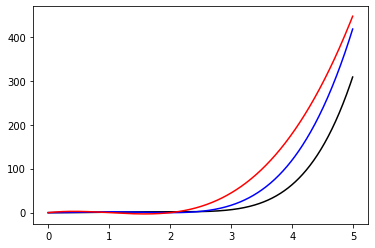

In [6]:
# For Joint 1
qt1 = np.linalg.inv(matA((0, 2))).dot([0, 0, 0, 2, 0, 0])
qt1 = np.round(qt1, 4)

t1 = np.arange(0.0, 5.0, 0.01)
plt.plot(t1, q(qt1, t1), 'k', t1, qd(qt1, t1), 'b', t1, qdd(qt1, t1), 'r')
plt.xlabel('t')
plt.show()

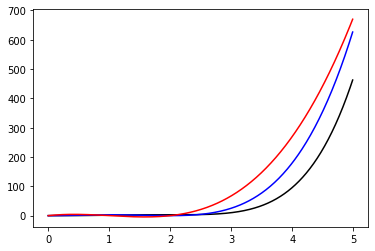

In [7]:
# For Joint 2
qt2 = np.linalg.inv(matA((0, 2))).dot([0, 0, 0, 3, 0, 0])
qt2 = np.round(qt2, 4)

t2 = np.arange(0.0, 5.0, 0.01)
plt.plot(t2, q(qt2, t2), 'k', t2, qd(qt2, t2), 'b', t2, qdd(qt2, t2), 'r')
plt.xlabel('t')
plt.show()

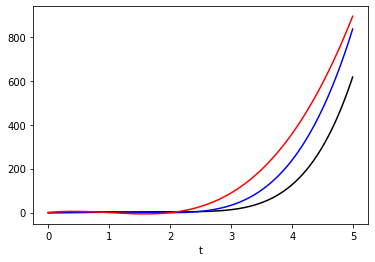

In [9]:
# For Joint 3
qt3 = np.linalg.inv(matA((0, 2))).dot([0, 0, 0, 4, 0, 0])
qt3 = np.round(qt3, 4)

t3 = np.arange(0.0, 5.0, 0.01)
plt.plot(t3, q(qt3, t3), 'k', t3, qd(qt3, t3), 'b', t3, qdd(qt3, t3), 'r')
plt.xlabel('t')
plt.show()